In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy import interpolate
from scipy import stats
from scipy import integrate
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import re

In [34]:
#FALCON-9 (ignoring R&D costs/profits for the company)
r_and_d = 1000000000
first_stage = 16800000
second_stage = 5600000
fairings = 2800000
refurb = 1000000
fuel_and_other = 2800000

def reusable_rocket_cost_falcon_9(num_launches):
    original_launch = first_stage + second_stage + fairings + fuel_and_other 
    second_launch = first_stage*(1/num_launches) + second_stage + (1/2)*fairings + fuel_and_other + refurb
    return second_launch/10e5

In [3]:
#STARSHIP (ignoring R&D costs/profits for the company)
r_and_d = 1000000000
reusable_hardware = 81336521.1
refurb = 1000000
fuel_and_other = 900000

def reusable_rocket_cost_starship(num_launches):
    original_launch = reusable_hardware + fuel_and_other 
    second_launch = reusable_hardware/num_launches + fuel_and_other + refurb
    return second_launch/10e5

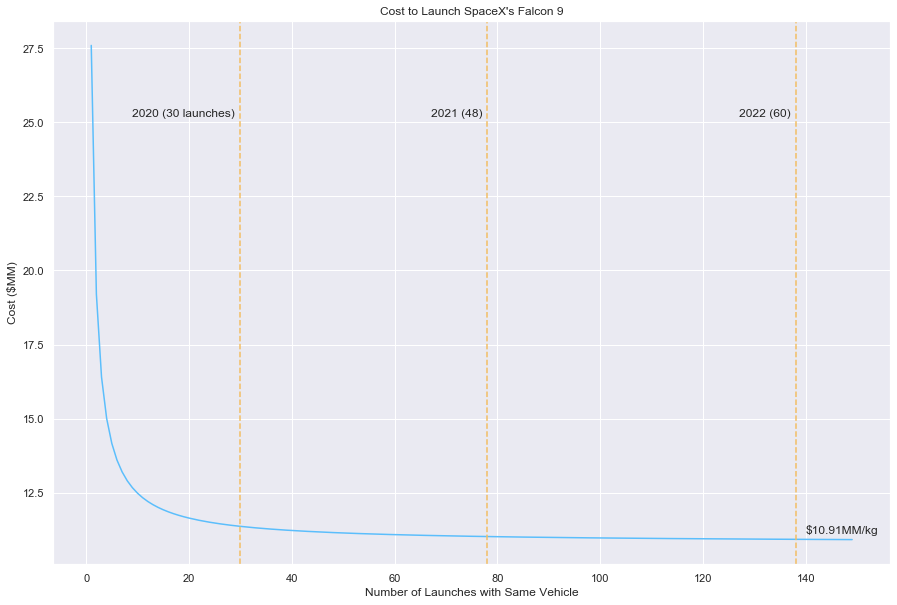

In [35]:
num_launches = np.arange(1, 150)
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(num_launches, reusable_rocket_cost_falcon_9(num_launches), color = '#5bbefc');
last = round(reusable_rocket_cost_falcon_9(num_launches)[-1], 2)
plt.title('Cost to Launch SpaceX\'s Falcon 9');
plt.xlabel('Number of Launches with Same Vehicle');
plt.ylabel('Cost ($MM)');
ax.axvline(30, ls = '--', color = '#f2be63'); plt.text(9, 25.2, s = '2020 (30 launches)');
ax.axvline(78, ls = '--', color = '#f2be63'); plt.text(67, 25.2, s = '2021 (48)');
ax.axvline(138, ls = '--', color = '#f2be63'); plt.text(127, 25.2, s = '2022 (60)');
plt.text(140, last + 0.2, s = '${}MM/kg'.format(last));
plt.savefig('falcon_9.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

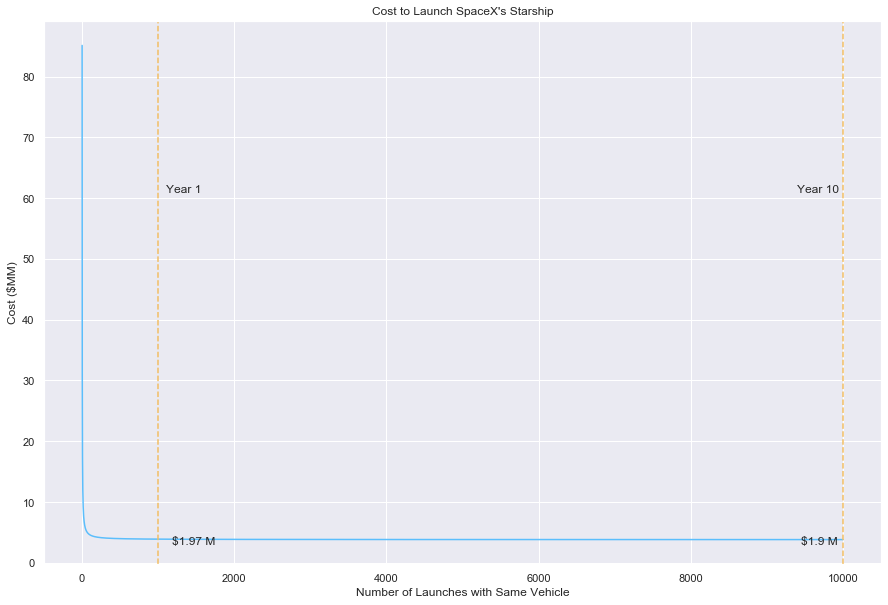

In [39]:
num_launches = np.arange(1, 1000*10)
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(num_launches, reusable_rocket_cost_starship(num_launches), color = '#5bbefc');
plt.title('Cost to Launch SpaceX\'s Starship');
plt.xlabel('Number of Launches with Same Vehicle');
plt.ylabel('Cost ($MM)');
ax.axvline(1000, ls = '--', color = '#f2be63'); plt.text(1100, 61, s = 'Year 1');
ax.axvline(10000, ls = '--', color = '#f2be63'); plt.text(9400, 61, s = 'Year 10');
plt.text(1180, 3, s = '$1.97 M');
plt.text(9450, 3, s = '$1.9 M');
plt.savefig('Starship_costs.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

In [37]:
launch_cost_data = pd.DataFrame(columns = ['Launch Vehicle', 'R&D', 'First Stage', 'Second Stage', 'Fairings', 'Fuel and Infrastructure', 'Refurbishment',
                                          '10 Launches ($M)', '100 Launches ($M)'])
launch_cost_data['Launch Vehicle'] = ['Falcon 9']
launch_cost_data['R&D'] = [1000000000]
launch_cost_data['First Stage'] = [16800000]
launch_cost_data['Second Stage'] = [5600000]
launch_cost_data['Fairings'] = [2800000]
launch_cost_data['Fuel and Infrastructure'] = [2800000]
launch_cost_data['Refurbishment'] = [1000000]
launch_cost_data['10 Launches ($M)'] = [reusable_rocket_cost_falcon_9(10)]
launch_cost_data['100 Launches ($M)'] = [reusable_rocket_cost_falcon_9(100)]
launch_cost_data = launch_cost_data.set_index('Launch Vehicle')

In [38]:
launch_cost_data

,R&D,First Stage,Second Stage,Fairings,Fuel and Infrastructure,Refurbishment,10 Launches ($M),100 Launches ($M)
Launch Vehicle,,,,,,,,
Falcon 9,1000000000,16800000,5600000,2800000,2800000,1000000,12.48,10.968
